In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from datetime import datetime  # 날짜 변환을 위한 모듈

options = webdriver.ChromeOptions()
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")
# options.add_argument("--headless") 

# 1. 웹 드라이버 설정
driver = webdriver.Chrome(options=options)
driver.get('https://tradingeconomics.com/commodity/coal')

# 2. "5Y" 버튼 클릭 (오류 방지)
try:
    # 명시적 대기: 버튼이 클릭 가능할 때까지 기다림
    five_year_button = WebDriverWait(driver, 20).until(
        EC.element_to_be_clickable((By.CSS_SELECTOR, "a[data-span='5y']"))
    )
    
    # JavaScript로 클릭 (클릭 인터셉트 문제 해결)
    driver.execute_script("arguments[0].click();", five_year_button)
    print("Successfully clicked '5Y' button.")
    time.sleep(3)  # 데이터 업데이트 대기

except Exception as e:
    print(f"Error clicking '5Y' button: {e}")
    driver.quit()
    exit()

# 3. Highcharts 데이터 추출 (JavaScript 실행)
try:
    chart_data = driver.execute_script("""
        return Highcharts.charts[0].series[0].data.map(point => {
            return { x: point.category, y: point.y };
        });
    """)

    # 4. 데이터 변환 및 출력
    extracted_data = []
    for point in chart_data:
        unix_timestamp = int(point['x']) // 1000  # 밀리초를 초로 변환
        readable_date = time.strftime('%Y-%m-%d', time.gmtime(unix_timestamp))  # 날짜 변환
        value = point['y']
        extracted_data.append({"Date": readable_date, "Value": value})
        print(f"Date: {readable_date}, Value: {value}")

except Exception as e:
    print(f"Error extracting data from Highcharts: {e}")

finally:
    # 브라우저 종료
    driver.quit()

# 데이터 출력 확인
print("Extracted Data:", extracted_data)


Successfully clicked '5Y' button.
Date: 2020-02-17, Value: 67.9
Date: 2020-02-24, Value: 67.4
Date: 2020-03-02, Value: 65.9
Date: 2020-03-16, Value: 66.15
Date: 2020-03-23, Value: 66.65
Date: 2020-03-30, Value: 66.2
Date: 2020-04-06, Value: 63.6
Date: 2020-04-13, Value: 61.9
Date: 2020-04-20, Value: 61.1
Date: 2020-04-27, Value: 51.25
Date: 2020-05-04, Value: 51.15
Date: 2020-05-11, Value: 51.75
Date: 2020-05-18, Value: 51.95
Date: 2020-05-25, Value: 52
Date: 2020-06-01, Value: 55.6
Date: 2020-06-08, Value: 53
Date: 2020-06-15, Value: 53.1
Date: 2020-06-22, Value: 53.5
Date: 2020-06-29, Value: 52.45
Date: 2020-07-06, Value: 52.4
Date: 2020-07-13, Value: 52.2
Date: 2020-07-20, Value: 52
Date: 2020-07-27, Value: 51.95
Date: 2020-08-03, Value: 51.2
Date: 2020-08-10, Value: 49.9
Date: 2020-08-17, Value: 49.8
Date: 2020-08-24, Value: 49.8
Date: 2020-08-31, Value: 49
Date: 2020-09-07, Value: 50.75
Date: 2020-09-14, Value: 51.5
Date: 2020-09-21, Value: 52.8
Date: 2020-09-28, Value: 58.6
Date:

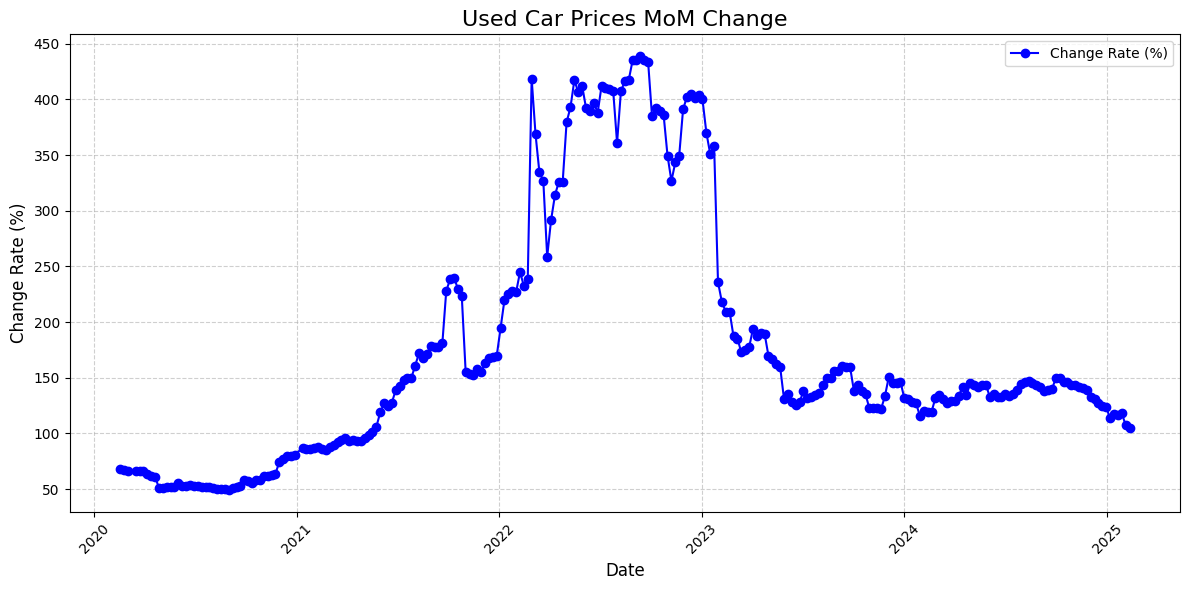

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Pandas DataFrame 생성
df = pd.DataFrame(extracted_data)
df["Date"] = pd.to_datetime(df["Date"])  # 날짜 형식으로 변환

# 3. 시각화
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Value"], marker="o", linestyle="-", color="b", label="Change Rate (%)")

# 그래프 제목 및 축 레이블 설정
plt.title("Used Car Prices MoM Change", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Change Rate (%)", fontsize=12)

# x축 레이블 회전 및 간격 조정
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)

# 범례 추가
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()